# Desafio 01 - Compartilhando Bicicletas - IGTI

In [5]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns #biblioteca utilizada para os plots mais bonitos
from sklearn.model_selection import train_test_split #biblioteca para a divisão do dataset entre treinamento e teste
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
from scipy import stats #biblioteca para analises estatisticas
from sklearn.linear_model import LinearRegression #importa o modelo de regressão linear univariada
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
from sklearn.preprocessing import MinMaxScaler #Função de processamento para normatizar variável
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor
from sklearn import metrics #biblioteca para metricas dos modelos

In [7]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
df = pd.read_csv(nome_do_arquivo)

# New Section

No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [8]:
# atributo para mostrar a quantidade de linha e colunas temos
df.shape

(17379, 17)

Quantos tipos diferentes de dados existem no dataset do desafio?

In [9]:
# conta a quantidade de dos tipos de dados de cada coluna
df.dtypes.value_counts()

float64    16
object      1
dtype: int64

Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

In [10]:
# Funcao para verificar valores nulos no dataset
def check_nulos(df, display = 10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    nulos_data = pd.DataFrame({'nulos': temp_df.isnull().sum(),'% nulos' :df_nan})
    if nulos_data['nulos'].sum() == 0:
        return print('Ótimo! Não há mais valores faltantes neste dataset.')
    else:
        return nulos_data.sort_values('% nulos', ascending = False).head(display)

# Verificando as colunas com dados nulos do dataset
check_nulos(df, display = 17)

nulos    % nulos
instant      1738  10.000575
weathersit   1738  10.000575
registered   1738  10.000575
casual       1738  10.000575
windspeed    1738  10.000575
hum          1738  10.000575
atemp        1738  10.000575
temp         1738  10.000575
workingday   1738  10.000575
dteday       1738  10.000575
weekday      1738  10.000575
holiday      1738  10.000575
hr           1738  10.000575
mnth         1738  10.000575
yr           1738  10.000575
season       1738  10.000575
cnt          1738  10.000575

Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

In [11]:
# método para apagar linhas com valores faltantes
df.dropna(subset=["dteday"],inplace=True)
# atributo para mostrar a quantidade de linha e colunas temos
df.shape

(15641, 17)

Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?



In [12]:
#função para mostrar a média
df["temp"].mean()

0.4969259206597582

Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

In [13]:
# função para mostrar o desvio padrão
df["windspeed"].std()

0.12230930508286268

Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

In [23]:
#comando para saber os possíveis tipos de dados do seu dataframe
df['season'].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [25]:
pd.Categorical(df['season'])

[1.0, 1.0, 1.0, 1.0, 1.0, ..., 1.0, NaN, 1.0, 1.0, NaN]
Length: 15641
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

In [16]:
# converte a coluna em data e mostra as ultimas linhas
pd.to_datetime(df['dteday']).tail()

17373   2012-12-31
17374   2012-12-31
17375   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

In [26]:
df['dteday'].tail()

17373    2012-12-31
17374    2012-12-31
17375    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, dtype: object

Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerando o boxplot da variável "windspeed" (velocidade do vento), é CORRETO afirmar:

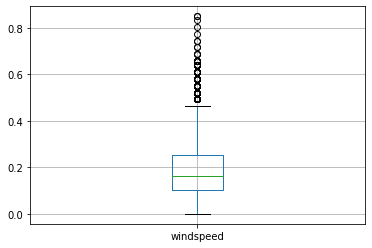

In [17]:
#identificando possíveis outliers
df[['windspeed']].boxplot()

Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt", é CORRETO afirmar:

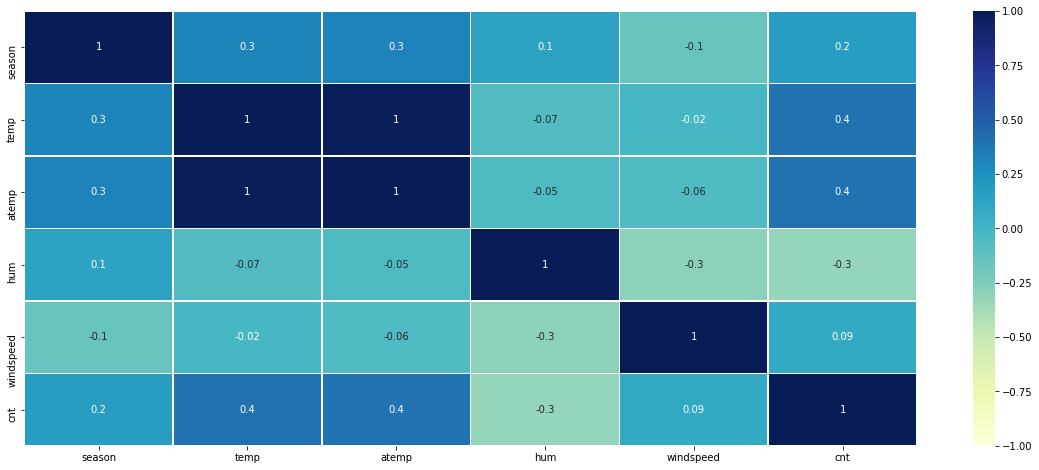

In [18]:
# Configurando o tamanho da area do grafico
plt.figure(figsize=(20, 8))

# Selecionando apenas algumas colunas para verificar a correlação
corr = df[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Configurar o heatmap
sns.heatmap(corr, linewidths=.5, vmin=-1, vmax=1, annot=True, cmap="YlGnBu", fmt='.1g')

# Imprimir o grafico
plt.show();

Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

In [19]:
# Fazendo previsões com o Modelo Linear Regression

# Criando um novo dataset somente com as colunas para a pergunta
new_df = df.loc[:, ('hum','casual','cnt')] 

# Preenchendo os valores nulos com a media de cada uma das colunas
new_df.fillna(new_df.mean(), inplace=True)

# Verificando as colunas com dados nulos do dataset
check_nulos(new_df, display = 3)

# Verificando o tamanho do dataset
new_df.shape

# Separando as features independentes e dependente (target)
X = new_df[['hum','casual']]
y = new_df['cnt']

# Criando o modelo de regressão linear
lr_model = LinearRegression()

# Fit do modelo
lr_model.fit(X, y)

# Previsões
y_pred = lr_model.predict(X)

# Avaliando as previsões
accuracy = r2_score(y, y_pred)
print("\nScore R2: %0.2f" % accuracy)

Ótimo! Não há mais valores faltantes neste dataset.

Score R2: 0.41


Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique Árvore de Decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

In [31]:
# Fazendo previsões com o Modelo Regressor de árvore de decisão

# Criando um novo dataset somente com as colunas para a pergunta
new_df = df.loc[:, ('hum','casual','cnt')] 

# Removendo os valores nulos
new_df.fillna(new_df.mean(), inplace=True)

# Verificando as colunas com dados nulos do dataset
check_nulos(new_df, display = 3)

# Verificando o tamanho do dataset
new_df.shape

# Separando as features independentes e dependente (target)
X = new_df[['hum','casual']]
y = new_df['cnt']

# Criando o modelo de arvore de decisão
dt_model = DecisionTreeRegressor()

# Fit do modelo
dt_model.fit(X, y)

# Previsões
y_pred = dt_model.predict(X)

# Avaliando as previsões
accuracy = r2_score(y, y_pred) 
accuracy

Ótimo! Não há mais valores faltantes neste dataset.


0.7098339715834964

Comparando os valores de R2 encontrado com a regressão linear e com a Árvore de Decisão, é CORRETO afirmar:

In [21]:
# Fazendo previsões com o Modelo SVM Regressor

# Import dos módulos
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Criando um novo dataset somente com as colunas para a pergunta
new_df = df.loc[:, ('hum','casual','cnt')] 

# Preenchendo os valores nulos com a media de cada uma das colunas
new_df.fillna(new_df.mean(), inplace=True)

# Verificando as colunas com dados nulos do dataset
check_nulos(new_df, display = 3)

# Verificando o tamanho do dataset
new_df.shape

# Separando as features independentes e dependente (target)
X = new_df[['hum','casual']]
y = new_df['cnt']

# Criando o modelo SVM
svm_model = SVR(kernel='rbf')

# Fit do modelo
svm_model.fit(X, y)

# Previsões
y_pred = svm_model.predict(X)

# Avaliando as previsões
accuracy = r2_score(y, y_pred)
print("\nScore R2: %0.2f" % accuracy)

Ótimo! Não há mais valores faltantes neste dataset.

Score R2: 0.40


Comparando o SVM com a Árvore de Decisão é CORRETO afirmar:

Logo, para isso serve o algoritmo chamado Support Vector Machine que tem um comportamento muito similar a regressão logística. Além de traçar uma reta ou hiper-plano, o algoritmo cria um limite da distância dos pontos mais distantes entre cada clusters. A margem que será definida, será a maior encontrada depois de inúmeras iterações.

Fonte: https://medium.com/@arthurlambletvaz/classificando-o-paladar-das-receitas-svm-bf0fbb185b10

Com base na Árvore de Decisão é CORRETO afirmar:

Árvores de decisão são métodos de aprendizado de máquinas supervisionado não-paramétricos, muito utilizados em tarefas de classificação e regressão.

Fonte: https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69